In [1]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import *

C:\Users\theco\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Tokenization and Stemming

In [2]:
ps = PorterStemmer()
with open('reviewSelected100.json', encoding = '"ISO-8859-1"') as f: #change this to the normal dataset
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#!pip install numpy

In [5]:
# #generating the random business id
# m = randrange(len(data))
# business_id_1 = data[m]['business_id']
# print(business_id_1)
# #Select random review and business_id
# m = randrange(len(data))
# business_id_2 = data[m]['business_id']
# print(business_id_2)

To maintain consistency, we will continue to use the 2 business ids that we generated on our first run. \
Business id 1: 2xrpo-LXV9uGIwpvy0dwUw \
Business id 2: LScYNYAA78iQL6pWOqt-WQ

In [6]:
#setting the randomly generated business ids
business_id_1 ='2xrpo-LXV9uGIwpvy0dwUw'
business_id_2 ='LScYNYAA78iQL6pWOqt-WQ'

Extracting the reviews and forming a dataset

In [7]:
#Extract all the reviews and form a small dataset for business id 1
print("-----Business ID 1------")
preStem1 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        print(text)
        word = word_tokenize(text)
        preStem1.extend(word)

-----Business ID 1------
went there for the first time today after driving 2000 miles across the country. my escalade was filthy and covered with bugs. they were very thorough with getting all of the bugs off and cleaning the inside.
pack a lunch! it took 35 minutes to get my car into the tunnel with only 4 cars ahead of me. it was well over an hour for a basic wash. i could see dirt left on my car when it came out of the tunnel. they let the car dry and then wiped it down with a damp rag. i assume that is not good for the paint.the wash was terrible. i recommend going to clean freak carwash if you expect to get what you pay for.
don't go here! the sales guys are complete slime balls! the service sucks and the wash is even worse. i watched the girl wax my car, then clean my wheels, then clean my interior windows and leather seats all with the same rag. i now have a waxy residue all over the inside of my windshield. 

not to mention that they slopped armorall all over my car, so now the

before i left, the guy asked me to make sure that i was happy with everything also.  i think that was perfect customer service.  they obviously want you to drive away happy and guarantee their work.
i just moved to arizona and didn't know my way around so i decided to go to here to get my car washed. 

i gave one star just because i felt really bad for the workers here, considering it was 110 degrees and they were working as sweat was dripping from their face. 

now let's get to the point: 

pros:  
fast service (20-30 mins) 


cons: 
water spots all over the car. 

dried soap still on the rear bumper and trunk lid

glass was only cleaned from outside 

rear mats were placed on the wrong sides and were not secured 

they forgot to vacuum under rear mats  

there was weird smell after i got in the car. idk if it was dirty towels they used or their sweaty shirts 



personally i do not recommend this car wash. i could've washed my car better at home.
the last 2 times i have been to this 

In [8]:
print(preStem1)

['went', 'there', 'for', 'the', 'first', 'time', 'today', 'after', 'driving', '2000', 'miles', 'across', 'the', 'country', '.', 'my', 'escalade', 'was', 'filthy', 'and', 'covered', 'with', 'bugs', '.', 'they', 'were', 'very', 'thorough', 'with', 'getting', 'all', 'of', 'the', 'bugs', 'off', 'and', 'cleaning', 'the', 'inside', '.', 'pack', 'a', 'lunch', '!', 'it', 'took', '35', 'minutes', 'to', 'get', 'my', 'car', 'into', 'the', 'tunnel', 'with', 'only', '4', 'cars', 'ahead', 'of', 'me', '.', 'it', 'was', 'well', 'over', 'an', 'hour', 'for', 'a', 'basic', 'wash.', 'i', 'could', 'see', 'dirt', 'left', 'on', 'my', 'car', 'when', 'it', 'came', 'out', 'of', 'the', 'tunnel', '.', 'they', 'let', 'the', 'car', 'dry', 'and', 'then', 'wiped', 'it', 'down', 'with', 'a', 'damp', 'rag', '.', 'i', 'assume', 'that', 'is', 'not', 'good', 'for', 'the', 'paint.the', 'wash', 'was', 'terrible', '.', 'i', 'recommend', 'going', 'to', 'clean', 'freak', 'carwash', 'if', 'you', 'expect', 'to', 'get', 'what', '

In [9]:
print("-----Business ID 2------")
preStem2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        print(text)
        word = word_tokenize(text)
        preStem2.extend(word)

-----Business ID 2------
we bring our two dogs (german shepherd and golden retriever) here all the time! usually on the weekends, we drive 45 min just to come here!
we love it & so do our pups!
great drink deals too!
kiddie pools in the summer to keep your pup nice and cool!
great atmosphere! but you must be a dog lover!
never seen a fight or anything. sometimes you see one or two dogs trying to boss around others (there is a grey pitbull, that i think belongs to an employee that always does that) but nothing serious. 
wish there was one of these closer to gastonia/kings mountain!
this is my favorite dog bar in the area! i miss living closer to it. the staff is super nice, and atmosphere is very laid back. my dog has a blast here. it's wonderful!
great concept in a great location, that being said there is a ton of room for improvement, the fence isn't very tall and there are a lot of areas that there is a bench pushed up to the fence making it very easy for any dog to escape. 
they all

great place! super friendly bar tender - travis. the dogs are off leash so interaction between them is great. indoor/outdoor space with plenty of water for the dogs. prices for drinks are fair. its a bit smelly... but its a dog bar, to be expected.
awesome, awesome place!!!! these guys are passionate about dogs too. it's cool their dogs are always with them! you can grab food from any local restaurant and kick it (aka drink) while your dog gets out all that energy! parking can be tricky as noda continues to grow. the staff is always pleasant and i can appreciate those amazing drink specials!!
nothing better than enjoying a pitcher beer special while my dogs get to run around and be social! lots of delivery food options in the area with menus by the bar makes for an even better experience.... just don't call domino's - they mess up your order every time. the staff and customers are friendly which keeps us coming back
you know how when you walk in a bar, you can love it or hate it, in se

In [10]:
print(preStem2)

['we', 'bring', 'our', 'two', 'dogs', '(', 'german', 'shepherd', 'and', 'golden', 'retriever', ')', 'here', 'all', 'the', 'time', '!', 'usually', 'on', 'the', 'weekends', ',', 'we', 'drive', '45', 'min', 'just', 'to', 'come', 'here', '!', 'we', 'love', 'it', '&', 'so', 'do', 'our', 'pups', '!', 'great', 'drink', 'deals', 'too', '!', 'kiddie', 'pools', 'in', 'the', 'summer', 'to', 'keep', 'your', 'pup', 'nice', 'and', 'cool', '!', 'great', 'atmosphere', '!', 'but', 'you', 'must', 'be', 'a', 'dog', 'lover', '!', 'never', 'seen', 'a', 'fight', 'or', 'anything', '.', 'sometimes', 'you', 'see', 'one', 'or', 'two', 'dogs', 'trying', 'to', 'boss', 'around', 'others', '(', 'there', 'is', 'a', 'grey', 'pitbull', ',', 'that', 'i', 'think', 'belongs', 'to', 'an', 'employee', 'that', 'always', 'does', 'that', ')', 'but', 'nothing', 'serious', '.', 'wish', 'there', 'was', 'one', 'of', 'these', 'closer', 'to', 'gastonia/kings', 'mountain', '!', 'this', 'is', 'my', 'favorite', 'dog', 'bar', 'in', 'th

To analyse the more important tokens from the dataset, we will proceed to remove punctuation, stopwords and special characters from the analysis.

In [11]:
#removing punctuation and stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

#removing the punctuations from the tokens
filtered_preStem1 = [w for w in preStem1 if not w in string.punctuation] 
filtered_preStem2 = [w for w in preStem2 if not w in string.punctuation]

#removing common tokens with not much meaning
meaninglessTokens = ["...","``","\"","--","\'",'\`',"\'\'"]
filtered_preStem1 = [w for w in filtered_preStem1 if not w in meaninglessTokens]
filtered_preStem2 = [w for w in filtered_preStem2 if not w in meaninglessTokens]

print(filtered_preStem1)
print("Number of tokens for business 1: ", len(filtered_preStem1)) #number of tokens in business 1

print(filtered_preStem2)
print("Number of tokens for business 2: ", len(filtered_preStem2)) #number of tokens in business 2

['went', 'there', 'for', 'the', 'first', 'time', 'today', 'after', 'driving', '2000', 'miles', 'across', 'the', 'country', 'my', 'escalade', 'was', 'filthy', 'and', 'covered', 'with', 'bugs', 'they', 'were', 'very', 'thorough', 'with', 'getting', 'all', 'of', 'the', 'bugs', 'off', 'and', 'cleaning', 'the', 'inside', 'pack', 'a', 'lunch', 'it', 'took', '35', 'minutes', 'to', 'get', 'my', 'car', 'into', 'the', 'tunnel', 'with', 'only', '4', 'cars', 'ahead', 'of', 'me', 'it', 'was', 'well', 'over', 'an', 'hour', 'for', 'a', 'basic', 'wash.', 'i', 'could', 'see', 'dirt', 'left', 'on', 'my', 'car', 'when', 'it', 'came', 'out', 'of', 'the', 'tunnel', 'they', 'let', 'the', 'car', 'dry', 'and', 'then', 'wiped', 'it', 'down', 'with', 'a', 'damp', 'rag', 'i', 'assume', 'that', 'is', 'not', 'good', 'for', 'the', 'paint.the', 'wash', 'was', 'terrible', 'i', 'recommend', 'going', 'to', 'clean', 'freak', 'carwash', 'if', 'you', 'expect', 'to', 'get', 'what', 'you', 'pay', 'for', 'do', "n't", 'go', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Stemming
stems1 = [ps.stem(w) for w in filtered_preStem1]
print(stems1)
print(len(stems1))

stems2 = [ps.stem(w) for w in filtered_preStem2]
print(stems2)
print(len(stems2))

['went', 'there', 'for', 'the', 'first', 'time', 'today', 'after', 'drive', '2000', 'mile', 'across', 'the', 'countri', 'my', 'escalad', 'wa', 'filthi', 'and', 'cover', 'with', 'bug', 'they', 'were', 'veri', 'thorough', 'with', 'get', 'all', 'of', 'the', 'bug', 'off', 'and', 'clean', 'the', 'insid', 'pack', 'a', 'lunch', 'it', 'took', '35', 'minut', 'to', 'get', 'my', 'car', 'into', 'the', 'tunnel', 'with', 'onli', '4', 'car', 'ahead', 'of', 'me', 'it', 'wa', 'well', 'over', 'an', 'hour', 'for', 'a', 'basic', 'wash.', 'i', 'could', 'see', 'dirt', 'left', 'on', 'my', 'car', 'when', 'it', 'came', 'out', 'of', 'the', 'tunnel', 'they', 'let', 'the', 'car', 'dri', 'and', 'then', 'wipe', 'it', 'down', 'with', 'a', 'damp', 'rag', 'i', 'assum', 'that', 'is', 'not', 'good', 'for', 'the', 'paint.th', 'wash', 'wa', 'terribl', 'i', 'recommend', 'go', 'to', 'clean', 'freak', 'carwash', 'if', 'you', 'expect', 'to', 'get', 'what', 'you', 'pay', 'for', 'do', "n't", 'go', 'here', 'the', 'sale', 'guy', 

['we', 'bring', 'our', 'two', 'dog', 'german', 'shepherd', 'and', 'golden', 'retriev', 'here', 'all', 'the', 'time', 'usual', 'on', 'the', 'weekend', 'we', 'drive', '45', 'min', 'just', 'to', 'come', 'here', 'we', 'love', 'it', 'so', 'do', 'our', 'pup', 'great', 'drink', 'deal', 'too', 'kiddi', 'pool', 'in', 'the', 'summer', 'to', 'keep', 'your', 'pup', 'nice', 'and', 'cool', 'great', 'atmospher', 'but', 'you', 'must', 'be', 'a', 'dog', 'lover', 'never', 'seen', 'a', 'fight', 'or', 'anyth', 'sometim', 'you', 'see', 'one', 'or', 'two', 'dog', 'tri', 'to', 'boss', 'around', 'other', 'there', 'is', 'a', 'grey', 'pitbul', 'that', 'i', 'think', 'belong', 'to', 'an', 'employe', 'that', 'alway', 'doe', 'that', 'but', 'noth', 'seriou', 'wish', 'there', 'wa', 'one', 'of', 'these', 'closer', 'to', 'gastonia/k', 'mountain', 'thi', 'is', 'my', 'favorit', 'dog', 'bar', 'in', 'the', 'area', 'i', 'miss', 'live', 'closer', 'to', 'it', 'the', 'staff', 'is', 'super', 'nice', 'and', 'atmospher', 'is', 'v

In [13]:
#distribution for tokens and stems for business 1
freq_dist1 = FreqDist(filtered_preStem1)
freq_dist1 = dict(freq_dist1) #diction
freq_dist1 = pd.Series(freq_dist1)
freq_dist1.sort_values(ascending=False, inplace=True)
stemmed_freq_dist1 = FreqDist(stems1)
stemmed_freq_dist1 = dict(stemmed_freq_dist1)
stemmed_freq_dist1 = pd.Series(stemmed_freq_dist1)
stemmed_freq_dist1.sort_values(ascending=False, inplace=True)

#distribution for tokens and stems for business 2
freq_dist2 = FreqDist(filtered_preStem2)
freq_dist2 = dict(freq_dist2) #diction
freq_dist2 = pd.Series(freq_dist2)
freq_dist2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist2 = FreqDist(stems2)
stemmed_freq_dist2 = dict(stemmed_freq_dist2)
stemmed_freq_dist2 = pd.Series(stemmed_freq_dist2)
stemmed_freq_dist2.sort_values(ascending=False, inplace=True)

C:\Users\theco\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\theco\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


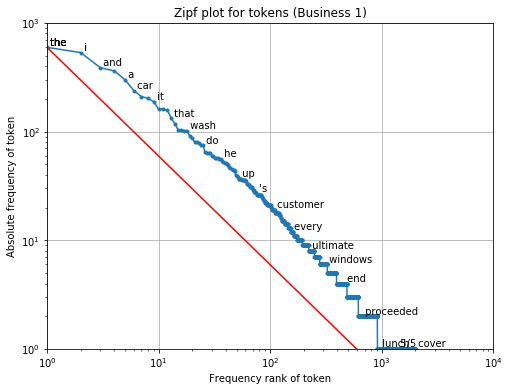

In [14]:
term_freq_df=pd.DataFrame(freq_dist1,columns=["count"])
from pylab import *
counts = term_freq_df["count"]
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**3)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tokens (Business 1)")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

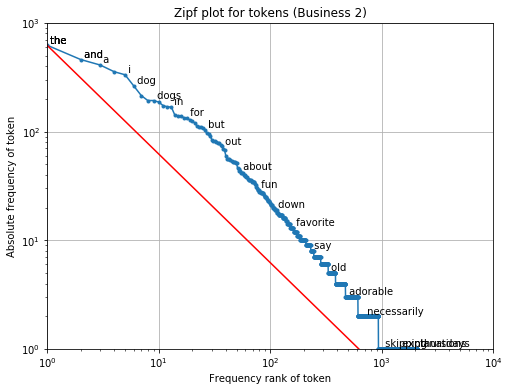

In [15]:
term_freq_df=pd.DataFrame(freq_dist2,columns=["count"])
from pylab import *
counts = term_freq_df["count"]
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**3)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tokens (Business 2)")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

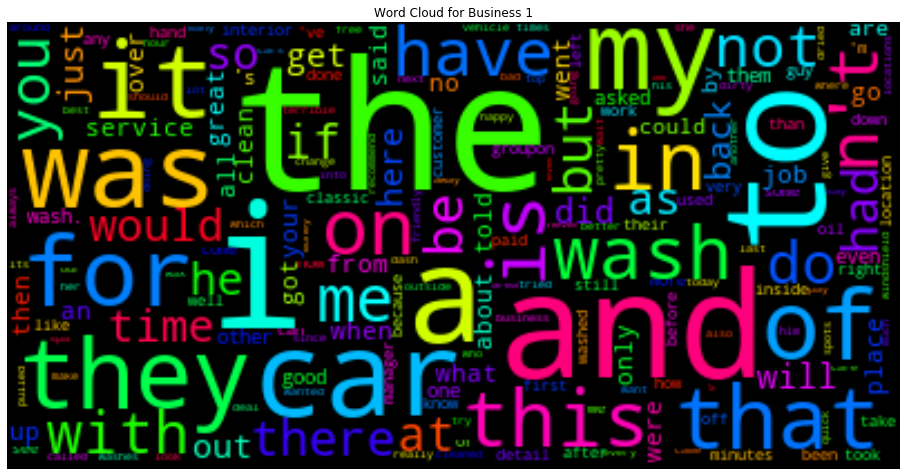

In [16]:
#Word cloud of tokens for business 1
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(freq_dist1)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Business 1")
plt.show()

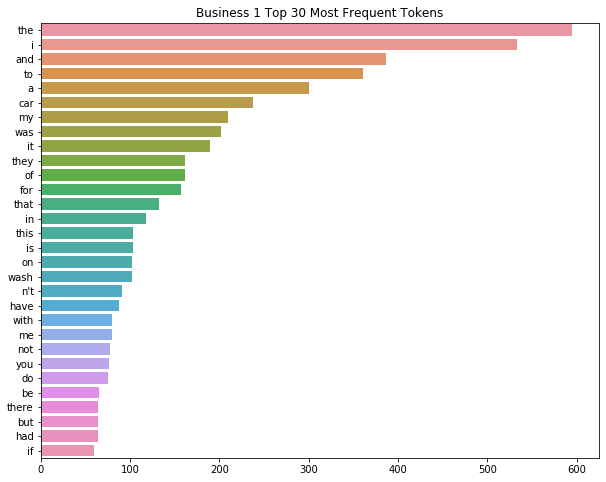

In [17]:
#Frequency distribution graph for the top 30 most common words
freq_dist1 = FreqDist(filtered_preStem1).most_common(30)
freq_dist1 = dict(freq_dist1)
freq_dist1 = pd.Series(freq_dist1)
freq_dist1.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist1.values, y=freq_dist1.index, ax=ax)
plt.title("Business 1 Top 30 Most Frequent Tokens")
plt.show()

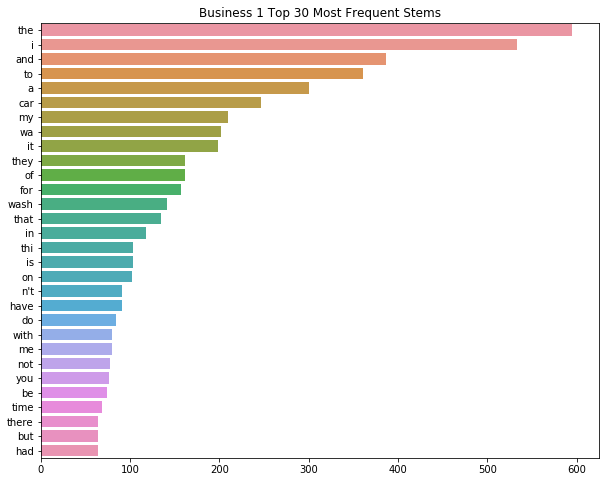

In [18]:
stemmed_freq_dist1 = FreqDist(stems1).most_common(30)
stemmed_freq_dist1 = dict(stemmed_freq_dist1)
stemmed_freq_dist1 = pd.Series(stemmed_freq_dist1)
stemmed_freq_dist1.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist1.values, y=stemmed_freq_dist1.index, ax=ax)
plt.title("Business 1 Top 30 Most Frequent Stems")
plt.show()

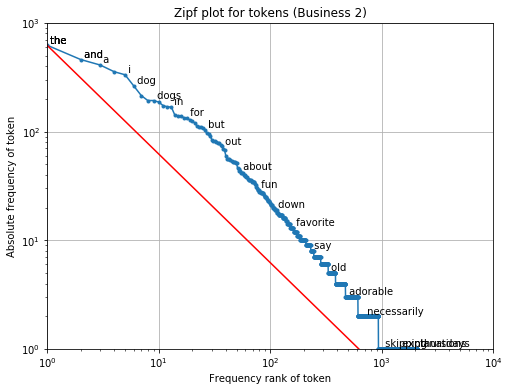

In [19]:
term_freq_df = pd.DataFrame(freq_dist2, columns = ["count"])
counts = term_freq_df["count"]
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**3)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tokens (Business 2)")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

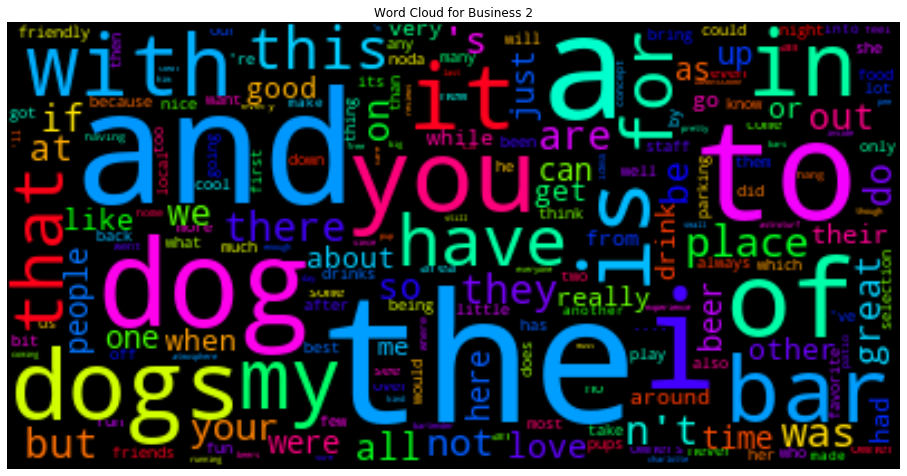

In [20]:
#word cloud for tokens of business 2
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(freq_dist2)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.title("Word Cloud for Business 2")
plt.axis('off')
plt.show()

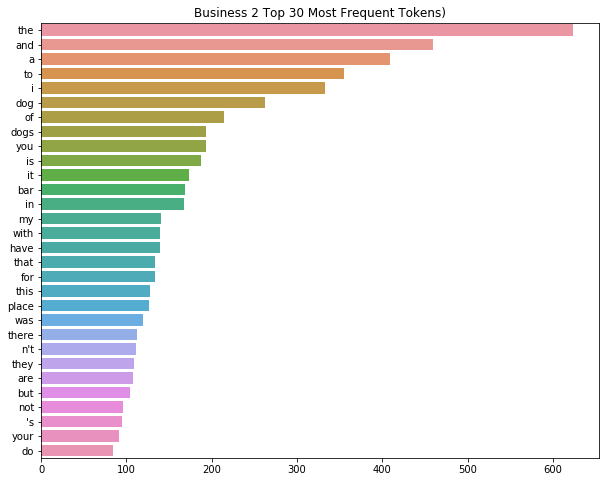

In [21]:
#Frequency distribution plot for top 30 tokens in business 2
freq_dist2 = FreqDist(filtered_preStem2).most_common(30)
freq_dist2 = dict(freq_dist2)
freq_dist2 = pd.Series(freq_dist2)
freq_dist2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist2.values, y=freq_dist2.index, ax=ax)
plt.title("Business 2 Top 30 Most Frequent Tokens)")
plt.show()

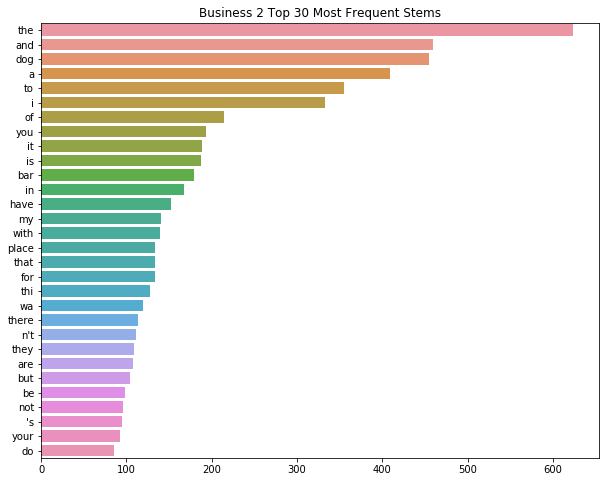

In [22]:
#Frequency distribution plot for top 30 stems in business 2
stemmed_freq_dist2 = FreqDist(stems2).most_common(30)
stemmed_freq_dist2 = dict(stemmed_freq_dist2)
stemmed_freq_dist2 = pd.Series(stemmed_freq_dist2)
stemmed_freq_dist2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist2.values, y=stemmed_freq_dist2.index, ax=ax)
plt.title("Business 2 Top 30 Most Frequent Stems")
plt.show()

## Top 10 words before and after performing stemming

In [23]:
#removing the stopwords from the token
filtered_preStem1 = [w for w in filtered_preStem1 if not w in sw]
filtered_preStem2 = [w for w in filtered_preStem2 if not w in sw]

Business 1

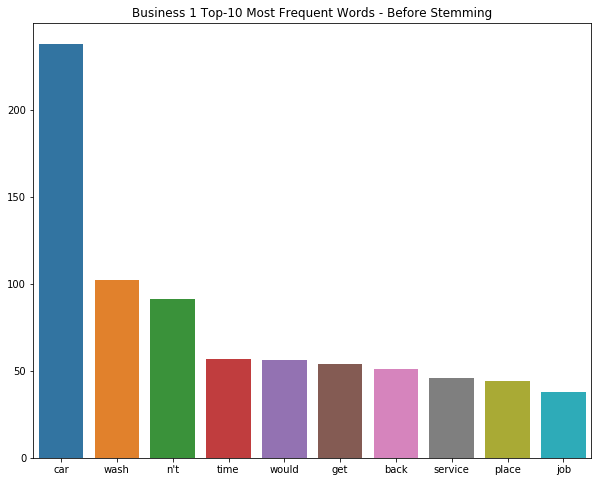

In [24]:
freq_dist1 = FreqDist(filtered_preStem1).most_common(10)
freq_dist1 = dict(freq_dist1)
freq_dist1 = pd.Series(freq_dist1)
freq_dist1.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist1.index, y=freq_dist1.values, ax=ax)
plt.title("Business 1 Top-10 Most Frequent Words - Before Stemming")
plt.show()

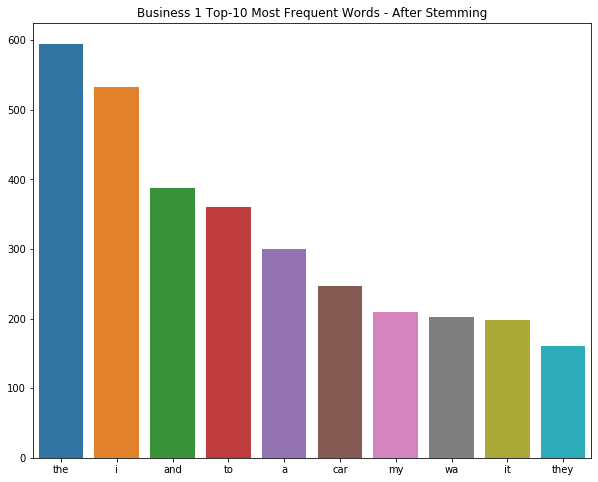

In [25]:
stemmed_freq_dist1 = FreqDist(stems1).most_common(10)
stemmed_freq_dist1 = dict(stemmed_freq_dist1)
stemmed_freq_dist1 = pd.Series(stemmed_freq_dist1)
stemmed_freq_dist1.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist1.index, y=stemmed_freq_dist1.values, ax=ax)
plt.title("Business 1 Top-10 Most Frequent Words - After Stemming")
plt.show()

Business 2

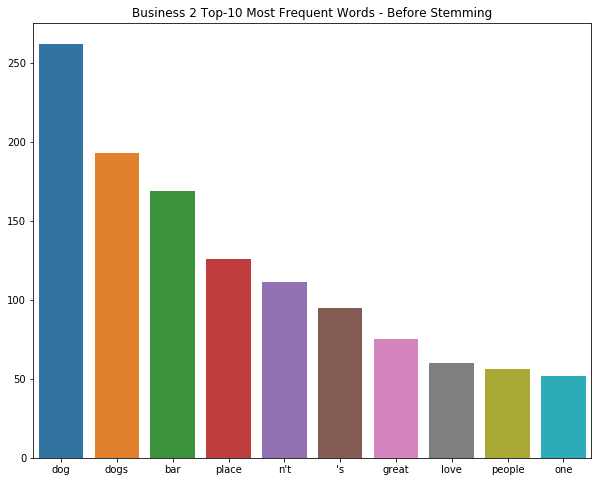

In [26]:
freq_dist2 = FreqDist(filtered_preStem2).most_common(10)
freq_dist2 = dict(freq_dist2)
freq_dist2 = pd.Series(freq_dist2)
freq_dist2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist2.index, y=freq_dist2.values, ax=ax)
plt.title("Business 2 Top-10 Most Frequent Words - Before Stemming")
plt.show()

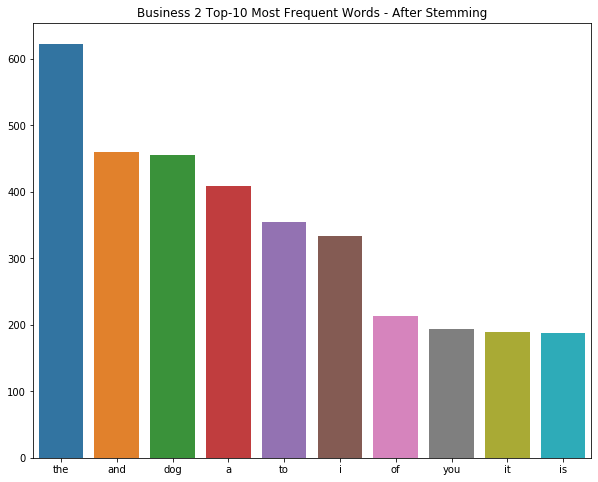

In [27]:
stemmed_freq_dist2 = FreqDist(stems2).most_common(10)
stemmed_freq_dist2 = dict(stemmed_freq_dist2)
stemmed_freq_dist2 = pd.Series(stemmed_freq_dist2)
stemmed_freq_dist2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist2.index, y=stemmed_freq_dist2.values, ax=ax)
plt.title("Business 2 Top-10 Most Frequent Words - After Stemming")
plt.show()

## POS Tagging

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\theco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [ ]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

## Writing Style


### Articles Chosen: 

*Channel News Asia*
> 1. https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496
2. https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

*Stackoverflow*
>1. https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file
2. https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

*HardwareZone*
>1. https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/
2. https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

---

In [ ]:
# returns (number of non capitalised proper nouns, total number of proper nouns)
def checkProperNounCapitalised(text, nlp):
    count = 0
    not_capitalised = 0
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "PROPN":
            count += 1
            if not token.text[0].isupper():
                not_capitalised += 1
    return (not_capitalised, count)

In [ ]:
def checkFirstWordCapitalised(text):
    punctuations = '''!()-[]{};:'"“”‘’\,<>./?@#$%^&*_~'''
    
    count = 0
    sentences = nltk.tokenize.sent_tokenize(text)
    for sentence in sentences:
        no_punct = ""
        for char in sentence:
           if char not in punctuations:
               no_punct = no_punct + char
        if no_punct[0].isupper():
            count += 1
    return (count, len(sentences))

In [ ]:
## Language checking function (CNA)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i].text
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)
    
## Language checking function (StackOverflow)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_so(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i]
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

## Language checking function (Hardware Zone)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_hwz(data):
    totalerrors = 0
    wordcount = 0

    test_sentence = data
    wordcount += len(test_sentence)
    matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
    totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

In [ ]:
import requests
from bs4 import BeautifulSoup

# scrape post from CNA
def scrape_text_CNA(website):
    site = requests.get(website)
    
    content = BeautifulSoup(site.content, 'html.parser')
    post = content.select('div.text-long p')
    return post

# scrape post from Stackoverflow
def scrape_text_stackoverflow(website):
    site = requests.get(website)
        
    content = BeautifulSoup(site.content, 'html.parser')
    questions = content.select('div.s-prose.js-post-body p')
    return questions

# scrape code from Stackoverflow
def scrape_code_stackoverflow(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    code = content.select('div.s-prose.js-post-body pre code')
    return code

# scrape post from HardwareZone
def scrape_text_hardwarezone(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    for script in content(["script", "style"]):
        script.extract()
    wrap = content.select('article.message-body.js-selectToQuote div.bbWrapper')
    return wrap[0].text

##### CNA #1

Article Name: ‘With school counsellors, it’s really hit-or-miss’: Behind the challenge of safeguarding student mental health

Website: https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496

In [ ]:
# need to load article before running function
cna1 = scrape_text_CNA('https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496')
for i in range(len(cna1)):
    print(cna1[i].text)
    print('\n')

In [ ]:
check_language_error(cna1)

In [ ]:
caps_cna_1 = []
total_count_cna1 = 0
total_numSentences_cna1 = 0

for i in range(len(cna1)):
    caps_cna_1 += [cna1[i].text]

for i in range(len(caps_cna_1)):
    (count, numSentences) = checkFirstWordCapitalised(caps_cna_1[i])
    total_count_cna1 += count
    total_numSentences_cna1 += numSentences

print("Total count of capitalised first words: ", total_count_cna1)
print("Total number of sentences: ", total_numSentences_cna1)
print("Percentage: ", (total_count_cna1/total_numSentences_cna1) * 100)

# analysis: first sentence - caption


In [ ]:
pronoun_cna1 = []
pronoun_count_cna1 = 0
total_pronoun_cna1 = 0

for i in range(len(cna1)):
    pronoun_cna1 += [cna1[i].text]

for i in range(len(pronoun_cna1)):
    (count, numSentences) = checkProperNounCapitalised(pronoun_cna1[i], nlp)
    pronoun_count_cna1 += count
    total_pronoun_cna1 += numSentences

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna1)
print("Total number of pronouns: ", total_pronoun_cna1)
print("Percentage: ", (pronoun_count_cna1/total_pronoun_cna1) * 100)

##### CNA #2

Article Name: Commentary: China's smackdown on corporate giants may be a start of national rebuilding

Website: https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

In [ ]:
# need to load article before running function
cna2 = scrape_text_CNA('https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091')
for i in range(len(cna2)):
    print(cna2[i].text)
    print('\n')

In [ ]:
check_language_error(cna2)

In [ ]:
caps_cna_2 = []
total_count_cna2 = 0
total_numSentences_cna2 = 0

for i in range(len(cna2)):
    caps_cna_2 += [cna2[i].text]

for i in range(len(caps_cna_2)):
    (count_cna2, numSentences_cna2) = checkFirstWordCapitalised(caps_cna_2[i])
    total_count_cna2 += count_cna2
    total_numSentences_cna2 += numSentences_cna2

print("Total count of capitalised first words: ", total_count_cna2)
print("Total number of sentences: ", total_numSentences_cna2)
print("Percentage: ", (total_count_cna2/total_numSentences_cna2) * 100)

In [ ]:
pronoun_cna2 = []
pronoun_count_cna2 = 0
total_pronoun_cna2 = 0

for i in range(len(cna2)):
    pronoun_cna2 += [cna2[i].text]

for i in range(len(pronoun_cna2)):
    (count_cna2, numSentences_cna2) = checkProperNounCapitalised(pronoun_cna2[i], nlp)
    pronoun_count_cna2 += count_cna2
    total_pronoun_cna2 += numSentences_cna2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna2)
print("Total number of pronouns: ", total_pronoun_cna2)
print("Percentage: ", (pronoun_count_cna2/total_pronoun_cna2) * 100)

##### StackOverflow #1

Post Name: how to automatically generate a unique c++ class based on a file

Website: https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file 

In [ ]:
# Scraping of Post Text
soText_1 = scrape_text_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
for i in range(len(soText_1)):
    print(soText_1[i].text)
    print('\n')

In [ ]:
check_language_error(soText_1)

In [ ]:
caps_so_1 = []
total_count_so1 = 0
total_numSentences_so1 = 0

for i in range(len(soText_1)):
    caps_so_1 += [soText_1[i].text]

for i in range(len(caps_so_1)):
    (count_so1, numSentences_so1) = checkFirstWordCapitalised(caps_so_1[i])
    total_count_so1 += count_so1
    total_numSentences_so1 += numSentences_so1

print("Total count of capitalised first words: ", total_count_so1)
print("Total number of sentences: ", total_numSentences_so1)
print("Percentage: ", (total_count_so1/total_numSentences_so1) * 100)

In [ ]:
pronoun_so1 = []
pronoun_count_so1 = 0
total_pronoun_so1 = 0

for i in range(len(soText_1)):
    pronoun_so1 += [soText_1[i].text]

for i in range(len(pronoun_so1)):
    (count_so1, numSentences_so1) = checkProperNounCapitalised(pronoun_so1[i], nlp)
    pronoun_count_so1 += count_so1
    total_pronoun_so1 += numSentences_so1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so1)
print("Total number of pronouns: ", total_pronoun_so1)
print("Percentage: ", (pronoun_count_so1/total_pronoun_so1) * 100)

In [ ]:
# Scraping of Whole Code
soCodeWhole_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
for i in range(len(soCodeWhole_1)):
    print(soCodeWhole_1[i].text)
    print('\n')

In [ ]:
# Tokenizing code
code_tokens = []
for i in range(len(soCodeWhole_1)):
    codeToken = word_tokenize(soCodeWhole_1[i].text)
    code_tokens.append(codeToken)

code_tokens

In [ ]:
# POS Tagging on code
# SPACY POS tagging
spacy_tags_p3 = []
for i in range(len(code_tokens)):
    for word in code_tokens[i]:
        spacy_tags_p3.append(nlp(word)[0].tag_)
    
# Print output
print(f"{'spaCy POS TAG':{15}}")
print()
for i in range(len(code_tokens)):
    for word in code_tokens[i]:
        print(f'{word:{15}} {spacy_tags[i]:{15}}')
print()

In [ ]:
check_language_error(soCodeWhole_1)

In [ ]:
# Scraping of Post Code Comments
import re
soCode_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
comments_1 = []
for i in range(len(soCode_1)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_1[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_1.append(space_cleaned)
for c in range(len(comments_1)):
    print(comments_1[c])
    print("\n")

# language error is not done due to the lack of comments in this post
#check_language_error_so(comments_1)

##### StackOverflow #2

Post Name: Debugging error org.apache.axis2.AxisFault: Connection or outbound has closed, the trustAnchors parameter must be non-empty

Website: https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

In [ ]:
# Scraping Post Text
soText_2 = scrape_text_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soText_2)):
    print(soText_2[i].text)
    print('\n')

In [ ]:
check_language_error(soText_2)

In [ ]:
caps_so_2 = []
total_count_so2 = 0
total_numSentences_so2 = 0

for i in range(len(soText_2)):
    caps_so_2 += [soText_2[i].text]

for i in range(len(caps_so_2)):
    (count_so2, numSentences_so2) = checkFirstWordCapitalised(caps_so_2[i])
    total_count_so2 += count_so2
    total_numSentences_so2 += numSentences_so2

print("Total count of capitalised first words: ", total_count_so2)
print("Total number of sentences: ", total_numSentences_so2)
print("Percentage: ", (total_count_so2/total_numSentences_so2) * 100)

In [ ]:
pronoun_so2 = []
pronoun_count_so2 = 0
total_pronoun_so2 = 0

for i in range(len(soText_2)):
    pronoun_so2 += [soText_2[i].text]

for i in range(len(pronoun_so2)):
    (count_so2, numSentences_so2) = checkProperNounCapitalised(pronoun_so2[i], nlp)
    pronoun_count_so2 += count_so2
    total_pronoun_so2 += numSentences_so2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so2)
print("Total number of pronouns: ", total_pronoun_so2)
print("Percentage: ", (pronoun_count_so2/total_pronoun_so2) * 100)

In [ ]:
# Scraping of Whole Code
soCodeWhole_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soCodeWhole_2)):
    print(soCodeWhole_2[i].text)
    print('\n')

In [ ]:
# Getting stem
codeStem_2_final = []
for i in range(len(soCodeWhole_2)):
    codeStem_2 = q3_stem(soCodeWhole_2[i].text)
    codeStem_2_final += codeStem_2
    
codeStem_2_final

In [ ]:
check_language_error(soCodeWhole_2)

In [ ]:
# Scraping of Post Code Comments
soCode_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
comments_2 = []
for i in range(len(soCode_2)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_2[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_2.append(space_cleaned)
for c in range(len(comments_2)):
    print(comments_2[c])
    print("\n")

In [ ]:
check_language_error_so(comments_2)

##### HardwareZone #1

Post Name: Beginner's Bible To Bodybuilding/Supplements/Fat-Loss ( Newbies Pls Read!!!)

Website: https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/

In [ ]:
# Scraping data from HardwareZone
hwz_1 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/')
print(hwz_1)

In [ ]:
check_language_error_hwz(hwz_1)

In [ ]:
total_count_hwz1 = 0
total_numSentences_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkFirstWordCapitalised(hwz_1)
total_count_hwz1 += count_hwz1
total_numSentences_hwz1 += numSentences_hwz1

print("Total count of capitalised first words: ", total_count_hwz1)
print("Total number of sentences: ", total_numSentences_hwz1)
print("Percentage: ", (total_count_hwz1/total_numSentences_hwz1) * 100)

In [ ]:
pronoun_count_hwz1 = 0
total_pronoun_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_1, nlp)    
pronoun_count_hwz1 += count_hwz1
total_pronoun_hwz1 += numSentences_hwz1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz1)
print("Total number of pronouns: ", total_pronoun_hwz1)
print("Percentage: ", (pronoun_count_hwz1/total_pronoun_hwz1) * 100)

##### HardwareZone #2

Post Name: Need advice. No internet for desktop on Singtel fibre

Website: https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

In [ ]:
hwz_2 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/')
print(hwz_2)

In [ ]:
check_language_error_hwz(hwz_2)

In [ ]:
total_count_hwz2 = 0
total_numSentences_hwz2 = 0

(count_hwz2, numSentences_hwz2) = checkFirstWordCapitalised(hwz_2)
total_count_hwz2 += count_hwz2
total_numSentences_hwz2 += numSentences_hwz2

print("Total count of capitalised first words: ", total_count_hwz2)
print("Total number of sentences: ", total_numSentences_hwz2)
print("Percentage: ", (total_count_hwz2/total_numSentences_hwz2) * 100)

In [ ]:
pronoun_count_hwz2 = 0
total_pronoun_hwz2 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_2, nlp)    
pronoun_count_hwz2 += count_hwz2
total_pronoun_hwz2 += numSentences_hwz2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz2)
print("Total number of pronouns: ", total_pronoun_hwz2)
print("Percentage: ", (pronoun_count_hwz2/total_pronoun_hwz2) * 100)

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating

In [ ]:
with open('reviewSelected100.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [ ]:
unique_businesses = set()
for review in data:
    unique_businesses.add(review['business_id'])
print("Number of businesses: " + str(len(unique_businesses)))

In [ ]:
# Function to retrieve X reviews (each from a unique business) by ratings
def retrieveUniqueReviewsByRating(num_of_reviews, rating, data):
    # First retrieve all the reviews of the given rating
    reviews_of_chosen_rating = []
    for review in data:
        if review['stars'] == rating:
            reviews_of_chosen_rating.append(review)
    
    # From the reviews retrieved, extract X reviews, one from each unique business
    unique_reviews = []
    business_set = set()
    while len(unique_reviews) < num_of_reviews:
        # Find a random review
        random_number = randrange(len(reviews_of_chosen_rating))
        # Don't take review if same business already taken
        if reviews_of_chosen_rating[random_number]['business_id'] in business_set:
            continue
        else:
            business_set.add(reviews_of_chosen_rating[random_number]['business_id'])
            unique_reviews.append(reviews_of_chosen_rating[random_number])
    return unique_reviews

Randomly select 50 reviews (one from each business) of rating 1, extract the top-10 most frequent noun-adjective pairs from the sentences in these selected reviews.

In [ ]:
# Get the reviews
reviews_rating_1 = retrieveUniqueReviewsByRating(50, 1, data)

In [ ]:
reviews_rating_1

In [ ]:
# Function used in find_noun_adj_pairs function to find nouns connected by conjunction (eg AND) that might share an adjective
def find_nouns_in_conjunction(token, noun):    
    queue = [noun]
    result = []
    while len(queue) > 0:
        noun = queue.pop(0)
        for c in noun.children:
            if c.pos_ == "NOUN" and c.dep_ == 'conj':
                result.append((c.text.lower(), token.text.lower()))
                queue.append(c)
    return result

In [ ]:
# Find all noun_adj pairs in review_text, by using dependency structure to find the nouns that each adjective is related to
def find_noun_adj_pairs(review_text, nlp):
    noun_adj_pairs = []
    sentences = nltk.tokenize.sent_tokenize(review_text)
    for sentence in sentences:
        doc = nlp(sentence)
        for token in doc:
            if token.pos_ == "ADJ":
                if token.dep_ == "amod":
                    noun = token.head
                    # Add the main head noun
                    if (noun.pos_ == "NOUN"):
                        noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                elif token.dep_ == "acomp" or token.dep_ == "oprd":
                    head = token.head
                    for c in head.children:
                        if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                            noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                            head = c
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
                elif token.dep_ == "conj":
                    temp = token.head
                    found_noun = True
                    while temp.dep_ != 'amod' and temp.dep_ != 'acomp' and temp.dep_ != 'oprd':
                        if temp.dep_ == 'conj' and temp.pos_ == 'ADJ':
                            temp = temp.head
                        else:
                            found_noun = False
                            break
                    if found_noun:
                        if temp.dep_ == 'amod':
                            noun = temp.head
                            # Add the main head noun
                            if (noun.pos_ == "NOUN"):
                                noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                        elif temp.dep_ == 'acomp' or temp.dep_ == 'oprd':
                            head = temp.head
                            for c in head.children:
                                if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                                    noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                                    head = c
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
    return noun_adj_pairs

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Visualise the first sentence of the first review --> study its dependency structure
from spacy import displacy
sample_review = reviews_rating_1[0]['text']
sample_sentence = nltk.tokenize.sent_tokenize(sample_review)[0]
displacy.render(nlp(sample_sentence), style='dep', jupyter=True)

In [ ]:
# Display the dependency structure of the sentence in another format
print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}".format('Token', 'POS', 'Relation','Head', 'Children'))
print ("-" * 75)

for token in nlp(sample_sentence):
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}"
         .format(str(token.text), str(token.pos_), str(token.dep_), str(token.head.text), str([child for child in token.children])))

In [ ]:
# Now lets extract all noun-adj pairs from our list of 1-star reviews
noun_adj_pairs_rating_1 = []

for review in reviews_rating_1:
    noun_adj_pairs_rating_1.extend(find_noun_adj_pairs(review['text'], nlp))

In [ ]:
# List of noun-adjective pairs extracted
noun_adj_pairs_rating_1

In [ ]:
# Extract only the 10 most common noun-adj pairs
freq_dist_rating_1 = FreqDist(noun_adj_pairs_rating_1).most_common(10)
freq_dist_rating_1 = list(freq_dist_rating_1)
freq_dist_rating_1 = pd.DataFrame(freq_dist_rating_1, columns = ["Noun-Adjective", "Count"])

In [ ]:
freq_dist_rating_1

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_1["Noun-Adjective"], x=freq_dist_rating_1['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 1)")
plt.show()

Do the same for 20 reviews of ratings 2, 3, 4 and 5, respectively.

In [ ]:
# Get the reviews
reviews_rating_2 = retrieveUniqueReviewsByRating(20, 2, data)
reviews_rating_3 = retrieveUniqueReviewsByRating(20, 3, data)
reviews_rating_4 = retrieveUniqueReviewsByRating(20, 4, data)
reviews_rating_5 = retrieveUniqueReviewsByRating(20, 5, data)

In [ ]:
noun_adj_pairs_rating_2 = []
noun_adj_pairs_rating_3 = []
noun_adj_pairs_rating_4 = []
noun_adj_pairs_rating_5 = []

for review in reviews_rating_2:
    noun_adj_pairs_rating_2.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_3:
    noun_adj_pairs_rating_3.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_4:
    noun_adj_pairs_rating_4.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_5:
    noun_adj_pairs_rating_5.extend(find_noun_adj_pairs(review['text'], nlp))

In [ ]:
freq_dist_rating_2 = FreqDist(noun_adj_pairs_rating_2).most_common(10)
freq_dist_rating_2 = list(freq_dist_rating_2)
freq_dist_rating_2 = pd.DataFrame(freq_dist_rating_2, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_3 = FreqDist(noun_adj_pairs_rating_3).most_common(10)
freq_dist_rating_3 = list(freq_dist_rating_3)
freq_dist_rating_3 = pd.DataFrame(freq_dist_rating_3, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_4 = FreqDist(noun_adj_pairs_rating_4).most_common(10)
freq_dist_rating_4 = list(freq_dist_rating_4)
freq_dist_rating_4 = pd.DataFrame(freq_dist_rating_4, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_5 = FreqDist(noun_adj_pairs_rating_5).most_common(10)
freq_dist_rating_5 = list(freq_dist_rating_5)
freq_dist_rating_5 = pd.DataFrame(freq_dist_rating_5, columns = ["Noun-Adjective", "Count"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_2["Noun-Adjective"], x=freq_dist_rating_2['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 2)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_3["Noun-Adjective"], x=freq_dist_rating_3['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 3)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_4["Noun-Adjective"], x=freq_dist_rating_4['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 4)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_5["Noun-Adjective"], x=freq_dist_rating_5['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 5)")
plt.show()